In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')


In [3]:
XGBRegressor

xgboost.sklearn.XGBRegressor

In [4]:
df = pd.read_csv(r'E:\Data_Science\machine_learning\ml_projects\student_end_to_end\notebook\data\stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop(labels =['math_score'],axis = 1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
numerical_faeatures = [col for col in X.columns if df[col].dtype !='O']
categorical_features = [col for col in X.columns if df[col].dtype =='O']
numerical_faeatures,categorical_features

(['reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [10]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
oh_encoder = OneHotEncoder()


In [11]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_encoder,categorical_features),
        ('StandardScaler',scaler,numerical_faeatures)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((800, 19), (800,), (200, 19), (200,))

In [18]:
def evaluate_model(true,predicted):
    mae = mean_squared_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true,predicted)
    
    return mae,rmse,r2

In [19]:
models = {
    'LinearRegression':LinearRegression(),
    "Lasso":Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'CatBoostRegressor' : CatBoostRegressor(verbose=False),
    'AdaBoostRegressor' : AdaBoostRegressor()
}

model_list =[]
r2_list = []

In [20]:
# Loop through models and evaluate them
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Store model name
    model_list.append(model_name)
    
    # Print training performance
    print(model_name)
    print("Model performance for the training set")
    print(f"- Root Mean Squared Error: {round(model_train_rmse, 2)}")
    print(f"- Mean Absolute Error: {round(model_train_mae, 2)}")
    print(f"- R2 Score: {round(model_train_r2, 2)}")
    
    # Print testing performance
    print("------------------------------------------------------")
    print("Model performance for the testing set")
    print(f"- Root Mean Squared Error: {round(model_test_rmse, 2)}")
    print(f"- Mean Absolute Error: {round(model_test_mae, 2)}")
    print(f"- R2 Score: {round(model_test_r2, 2)}")
    
    # Store R2 score for the testing set
    r2_list.append(model_test_r2)

LinearRegression
Model performance for the training set
- Root Mean Squared Error: 5.32
- Mean Absolute Error: 28.33
- R2 Score: 0.87
------------------------------------------------------
Model performance for the testing set
- Root Mean Squared Error: 5.39
- Mean Absolute Error: 29.1
- R2 Score: 0.88
Lasso
Model performance for the training set
- Root Mean Squared Error: 6.59
- Mean Absolute Error: 43.48
- R2 Score: 0.81
------------------------------------------------------
Model performance for the testing set
- Root Mean Squared Error: 6.52
- Mean Absolute Error: 42.51
- R2 Score: 0.83
Ridge
Model performance for the training set
- Root Mean Squared Error: 5.32
- Mean Absolute Error: 28.34
- R2 Score: 0.87
------------------------------------------------------
Model performance for the testing set
- Root Mean Squared Error: 5.39
- Mean Absolute Error: 29.06
- R2 Score: 0.88
KNeighborsRegressor
Model performance for the training set
- Root Mean Squared Error: 5.71
- Mean Absolute E

In [21]:
for r2 in r2_list:
    print(r2)

r2_list

0.8804332983749564
0.8253197323627852
0.8805931485028738
0.7840299763621361
0.7243961495596256
0.8518415441894736
0.8277965784072876
0.8516318920747058
0.8469699409021197


[0.8804332983749564,
 0.8253197323627852,
 0.8805931485028738,
 0.7840299763621361,
 0.7243961495596256,
 0.8518415441894736,
 0.8277965784072876,
 0.8516318920747058,
 0.8469699409021197]

In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','r2_score']).sort_values(by='r2_score',ascending=False)

,model,r2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.851842
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.846970
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.784030
4,DecisionTreeRegressor,0.724396


In [23]:
# Here linear regression is performing well

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
accuracy = r2_score(y_test,y_pred)
print(f'Accuracy of the score is {accuracy*100:.2f} %')


Accuracy of the score is 88.04 %


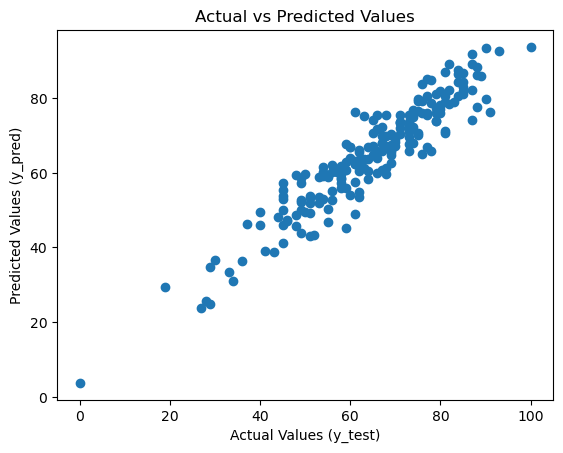

In [25]:

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()


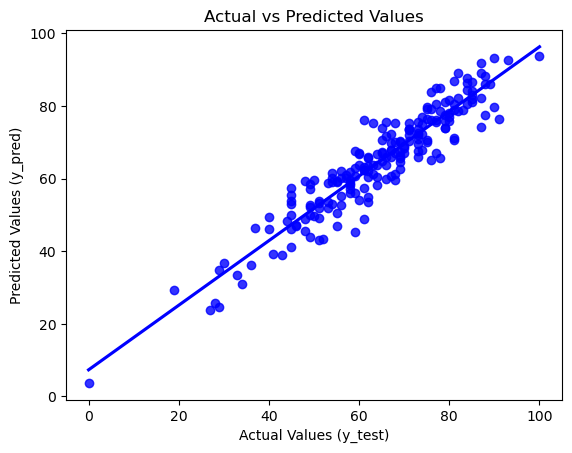

In [26]:

sns.regplot(x=y_test,y=y_pred,ci=None,color='blue')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()

In [27]:
# Difference between the actual and the predicted values

In [31]:
pred_df = pd.DataFrame( {'actual_values':y_test,'predicted_values':y_pred,'difference':y_test-y_pred} ).reset_index(drop=True)

In [32]:
pred_df.head()

,actual_values,predicted_values,difference
0,91,76.387970,14.612030
1,53,58.885970,-5.885970
2,80,76.990265,3.009735
3,74,76.851804,-2.851804
4,84,87.627378,-3.627378
